# Fake News Classifier using NLP

# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import string
import nltk
import warnings
warnings.filterwarnings('ignore')

# Loading the datasets

In [2]:
fake = pd.read_csv(r'C:\Users\HP\Desktop\majorProject\Fake.csv')

In [3]:
true = pd.read_csv(r"C:\Users\HP\Desktop\majorProject\True.csv")

In [4]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,31-Dec-17
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,29-Dec-17
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,31-Dec-17
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,30-Dec-17
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,29-Dec-17


In [6]:
fake['label'] = 'fake'
true['label'] = 'true'

In [7]:
combined = pd.concat([fake, true], axis=0).reset_index(drop=True)

In [8]:
combined.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake


# Some data cleaning and analysis

In [9]:
from sklearn.utils import shuffle
combined = shuffle(combined)

In [10]:
combined.drop(['title', 'date'], axis=1, inplace=True)

In [11]:
#converting all strings to lower case
combined['text'] = combined['text'].apply(lambda x : x.lower())
combined.head()

,text,subject,label
29925,"sacramento, calif. (reuters) - a california re...",politicsNews,true
1701,landowners in nebraska are understandably upse...,News,fake
37016,berlin (reuters) - nato should defend sweden a...,worldnews,true
39940,(this october 25 story has been corrected to ...,worldnews,true
23845,moscow (reuters) - the kremlin said on monday ...,politicsNews,true


In [12]:
def characters (text) :
    text = [char for char in text if char not in string.punctuation]
    clean = ''.join(text)
    return clean

In [13]:
combined['text'] = combined['text'].apply(characters)

In [14]:
combined

,text,subject,label
29925,sacramento calif reuters a california republi...,politicsNews,true
1701,landowners in nebraska are understandably upse...,News,fake
37016,berlin reuters nato should defend sweden and ...,worldnews,true
39940,this october 25 story has been corrected to c...,worldnews,true
23845,moscow reuters the kremlin said on monday rus...,politicsNews,true
...,...,...,...
43070,dubai reuters saudi arabia said on wednesday ...,worldnews,true
20494,it s really quite ironic that the guy who has ...,left-news,fake
15575,does anyone care if hillary personally gassed ...,politics,fake
29677,washington reuters the united states sent fou...,politicsNews,true


In [15]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


In [16]:
len(stop_words)

179

In [17]:
combined['text'] =  combined['text'].apply(lambda x : ' '.join([word for word in x.split() if word not in (stop_words)]))

In [18]:
Label  = combined.groupby('label')['text'].count()
print(Label)

label
fake    23481
true    21417
Name: text, dtype: int64


<AxesSubplot:xlabel='label'>

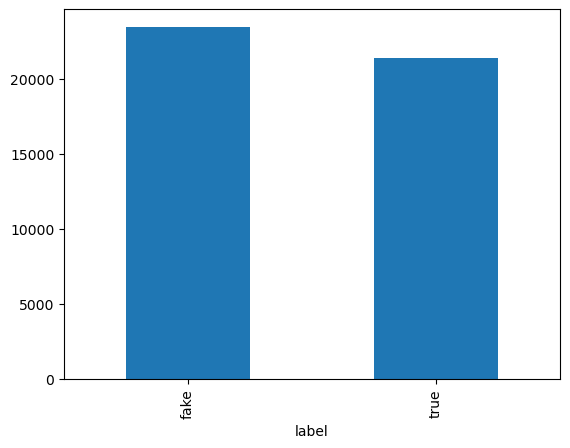

In [19]:
Label.plot(kind='bar')

In [20]:
Subject = combined.groupby('subject')['text'].count()
print(Subject)

subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


<AxesSubplot:xlabel='subject'>

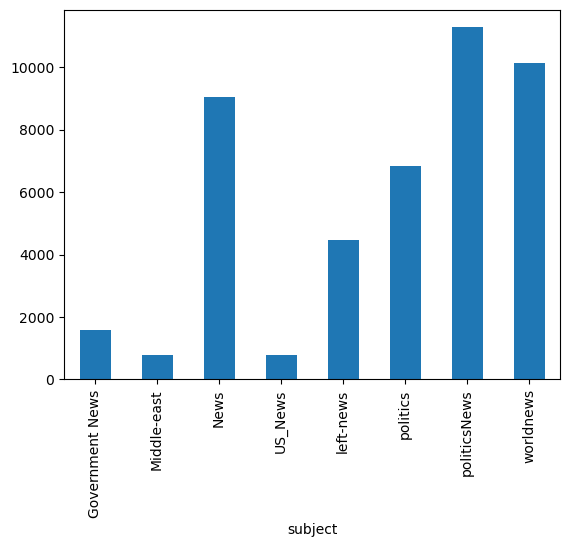

In [21]:
Subject.plot(kind='bar')

In [22]:
from wordcloud import WordCloud

(-0.5, 499.5, 499.5, -0.5)

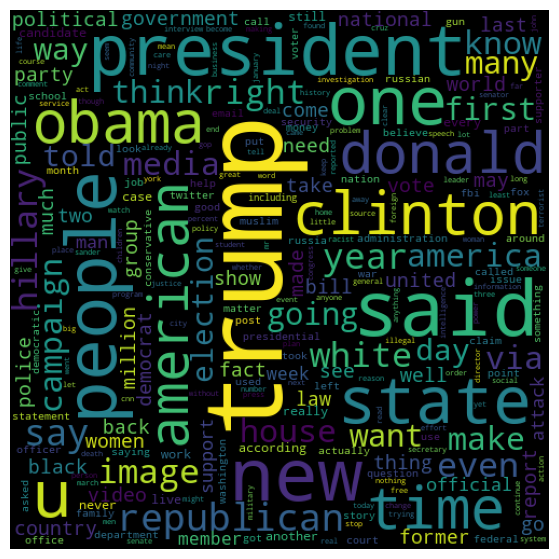

In [23]:
fake_labels = combined[combined['label'] == 'fake']
fake_words = ' '.join([text for text in fake_labels.text])
fake_cloud = WordCloud(width=500, height=500, max_words=250, max_font_size=100, collocations = False).generate(fake_words)
plt.figure(figsize=(10, 7))
plt.imshow(fake_cloud)
plt.axis('off')

(-0.5, 499.5, 499.5, -0.5)

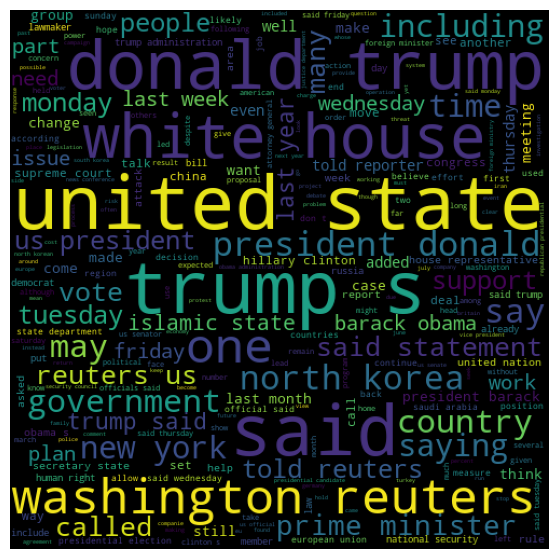

In [24]:
true_labels = combined[combined['label'] == 'true']
true_words = ' '.join([text for text in true_labels.text])
true_cloud = WordCloud(width=500, height=500, max_words=250, max_font_size=100).generate(true_words)
plt.figure(figsize=(10, 7))
plt.imshow(true_cloud)
plt.axis('off')

In [25]:
from nltk import tokenize
spaces = tokenize.WhitespaceTokenizer()

# Model training and evaluation

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(combined['text'], combined.label, test_size = 0.2, random_state = 101)

In [28]:
X_train.head()

418      somebody must put truth serum little donnie ch...
13610    desire push hillary clinton across finish line...
17372    stats lie one obama hoping reach low informati...
3168     tuesday donald trump amped stupidity latest at...
38069    berlin reuters chancellor angela merkel effort...
Name: text, dtype: object

In [29]:
y_train.head()

418      fake
13610    fake
17372    fake
3168     fake
38069    true
Name: label, dtype: object

In [30]:
print(X_train.shape)
print(y_train.shape)

(35918,)
(35918,)


# We will use Decision Tree Classifier

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [32]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), 
                 ('model', DecisionTreeClassifier(criterion= 'entropy', max_depth = 20,
                                                  splitter='best', random_state=101))])

In [33]:
model = pipe.fit(X_train, y_train)

In [34]:
pred = model.predict(X_test)

In [35]:
print("Classifier Accuracy Score: {}%".format(round(accuracy_score(y_test, pred)*100,2)))

Classifier Accuracy Score: 99.64%
